# 필기체 숫자 인식에 PCA 적용예제

Sklearn에서 제공하는 데이터 세트의 필기체 인식을 통해 PCA 예제를 살펴봅니다.

데이터 : 0~9까지의 필기체가 $8\times8$ 행렬(64개)의 픽셀 강도값을 가진 특징값

PCA를 이용하여, 64개의 특징 차원을 최소화해보려고 합니다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

import warnings
warnings.filterwarnings('ignore')

In [6]:
mpl.rcParams['figure.figsize'] = (6, 4)

## 1. Data loading

In [39]:
digits = load_digits()
x = digits.data
y = digits.target

In [34]:
print(x.shape)
print(x[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


0


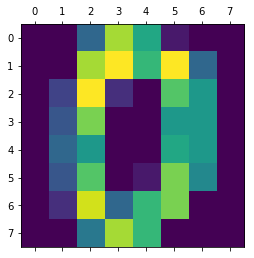

In [37]:
# 그림을 그려봅니다.
print(y[0])
plt.matshow(digits.images[0])

## 2. Data normalizing

PCA는 데이터의 분산을 최대화합니다. 따라서, 특정 feature의 scale이 다른 feature의 scale보다 크면 분산에 큰 영향을 미치게 됩니다. 이 경우 normalizing을 해서 scale을 맞춥니다.

In [40]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_x[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

## 3. 2차원 Principal Component Analysis

### (1) PCA

In [43]:
pca = PCA(n_components=2)
reduced_x = pca.fit_transform(scaled_x)

### (2) 시각화

#### A. 시각화를 위해 transform 데이터를 리스트에 넣는다.

In [45]:
zero_x, zero_y = [], []
one_x, one_y = [], []
two_x, two_y = [], []
three_x, three_y = [], []
four_x, four_y = [], []
five_x, five_y = [], []
six_x, six_y = [], []
seven_x, seven_y = [], []
eight_x, eight_y = [], []
nine_x, nine_y = [], []

In [48]:
for i in range(len(reduced_x)):
    if y[i] == 0:
        zero_x.append(reduced_x[i][0])
        zero_y.append(reduced_x[i][1])
    elif y[i] == 1:
        one_x.append(reduced_x[i][0])
        one_y.append(reduced_x[i][1])
    elif y[i] == 2:
        two_x.append(reduced_x[i][0])
        two_y.append(reduced_x[i][1])                
    elif y[i] == 3:
        three_x.append(reduced_x[i][0])
        three_y.append(reduced_x[i][1])
    elif y[i] == 4:
        four_x.append(reduced_x[i][0])
        four_y.append(reduced_x[i][1])
    elif y[i] == 5:
        five_x.append(reduced_x[i][0])
        five_y.append(reduced_x[i][1])
    elif y[i] == 6:
        six_x.append(reduced_x[i][0])
        six_y.append(reduced_x[i][1])
    elif y[i] == 7:
        seven_x.append(reduced_x[i][0])
        seven_y.append(reduced_x[i][1])
    elif y[i] == 8:
        eight_x.append(reduced_x[i][0])
        eight_y.append(reduced_x[i][1])
    elif y[i] == 9:
        nine_x.append(reduced_x[i][0])
        nine_y.append(reduced_x[i][1])        

#### B.  데이터를 plotting 한다.

In [49]:
mpl.rcParams['figure.figsize'] = (12, 8)

Text(0, 0.5, 'PC 2')

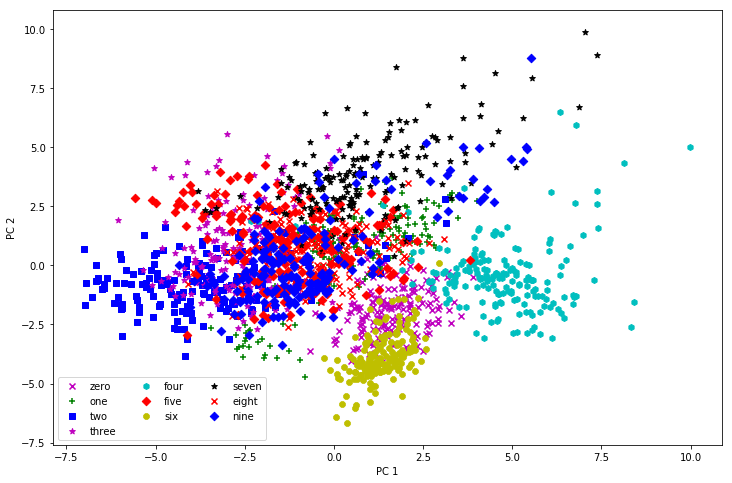

In [50]:
zero = plt.scatter(zero_x, zero_y, c='m', marker='x', label='zero')
one = plt.scatter(one_x, one_y, c='g', marker='+', label='one')
two = plt.scatter(two_x, two_y, c='b', marker='s', label='two')
three = plt.scatter(three_x, three_y, c='m', marker='*', label='three')
four = plt.scatter(four_x, four_y, c='c', marker='h', label='four')
five = plt.scatter(five_x, five_y, c='r', marker='D', label='five')
six = plt.scatter(six_x, six_y, c='y', marker='8', label='six')
seven = plt.scatter(seven_x, seven_y, c='k', marker='*', label='seven')
eight = plt.scatter(eight_x, eight_y, c='r', marker='x', label='eight')
nine = plt.scatter(nine_x, nine_y, c='b', marker='D', label='nine')

plt.legend(
    (zero, one, two, three, four, five, six, seven, eight, nine),
    ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'),
    scatterpoints=1,
    loc='lower left',
    ncol=3,
    fontsize=10)

plt.xlabel('PC 1')
plt.ylabel('PC 2')

## 3. 3차원 Principal Component Analysis

### (1) PCA

In [51]:
pca = PCA(n_components=3)
reduced_x = pca.fit_transform(scaled_x)

### (2) 시각화

#### A. 시각화를 위해 transform 데이터를 리스트에 넣는다.

In [52]:
zero_x, zero_y, zero_z = [], [], []
one_x, one_y, one_z = [], [], []
two_x, two_y, two_z = [], [], []
three_x, three_y, three_z = [], [], []
four_x, four_y, four_z = [], [], []
five_x, five_y, five_z = [], [], []
six_x, six_y, six_z = [], [], []
seven_x, seven_y, seven_z = [], [], []
eight_x, eight_y, eight_z = [], [], []
nine_x, nine_y, nine_z = [], [], []

In [53]:
for i in range(len(reduced_x)):
    if y[i] == 0:
        zero_x.append(reduced_x[i][0])
        zero_y.append(reduced_x[i][1])
        zero_z.append(reduced_x[i][2])
    elif y[i] == 1:
        one_x.append(reduced_x[i][0])
        one_y.append(reduced_x[i][1])
        one_z.append(reduced_x[i][2])
    elif y[i] == 2:
        two_x.append(reduced_x[i][0])
        two_y.append(reduced_x[i][1])                
        two_z.append(reduced_x[i][2])
    elif y[i] == 3:
        three_x.append(reduced_x[i][0])
        three_y.append(reduced_x[i][1])
        three_z.append(reduced_x[i][2])
    elif y[i] == 4:
        four_x.append(reduced_x[i][0])
        four_y.append(reduced_x[i][1])
        four_z.append(reduced_x[i][2])
    elif y[i] == 5:
        five_x.append(reduced_x[i][0])
        five_y.append(reduced_x[i][1])
        five_z.append(reduced_x[i][2])
    elif y[i] == 6:
        six_x.append(reduced_x[i][0])
        six_y.append(reduced_x[i][1])
        six_z.append(reduced_x[i][2])
    elif y[i] == 7:
        seven_x.append(reduced_x[i][0])
        seven_y.append(reduced_x[i][1])
        seven_z.append(reduced_x[i][2])
    elif y[i] == 8:
        eight_x.append(reduced_x[i][0])
        eight_y.append(reduced_x[i][1])
        eight_z.append(reduced_x[i][2])
    elif y[i] == 9:
        nine_x.append(reduced_x[i][0])
        nine_y.append(reduced_x[i][1])        
        nine_z.append(reduced_x[i][2])

#### B.  데이터를 plotting 한다.

In [54]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'PC 3')

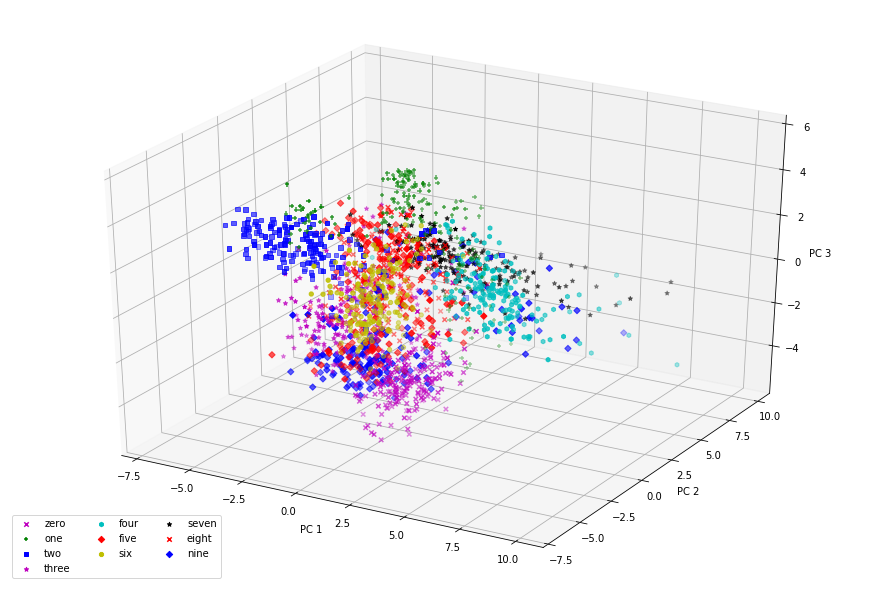

In [56]:
fig = pyplot.figure()
ax = Axes3D(fig)

zero = ax.scatter(zero_x, zero_y, zero_z, c='m', marker='x', label='zero')
one = ax.scatter(one_x, one_y, one_z, c='g', marker='+', label='one')
two = ax.scatter(two_x, two_y, two_z, c='b', marker='s', label='two')
three = ax.scatter(three_x, three_y, three_z, c='m', marker='*', label='three')
four = ax.scatter(four_x, four_y, four_z, c='c', marker='h', label='four')
five = ax.scatter(five_x, five_y, five_z, c='r', marker='D', label='five')
six = ax.scatter(six_x, six_y, six_z, c='y', marker='8', label='six')
seven = ax.scatter(seven_x, seven_y, seven_z, c='k', marker='*', label='seven')
eight = ax.scatter(eight_x, eight_y, eight_z, c='r', marker='x', label='eight')
nine = ax.scatter(nine_x, nine_y, nine_z, c='b', marker='D', label='nine')

ax.legend(
    (zero, one, two, three, four, five, six, seven, eight, nine),
    ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'),
    numpoints=1,
    loc='lower left',
    ncol=3,
    fontsize=10,
    bbox_to_anchor=(0, 0))

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

## 4. 최적의 principal component의 개수를 찾기

몇 개의 principal component를 추출할지에 대한 기준
- 전체 설명된 분산이 미미하게 감소하기 시작하는 시점
- 설명된 분산이 전체의 80% 이상일 경우

In [57]:
max_pc = 30

In [59]:
principal_components = []
total_explained_var = []

In [61]:
for i in range(max_pc):
    pca = PCA(n_components=i+1)
    reduced_x = pca.fit_transform(scaled_x)
    variance = pca.explained_variance_ratio_.sum()
    principal_components.append(i+1)
    total_explained_var.append(variance)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 11 Text yticklabel objects>)

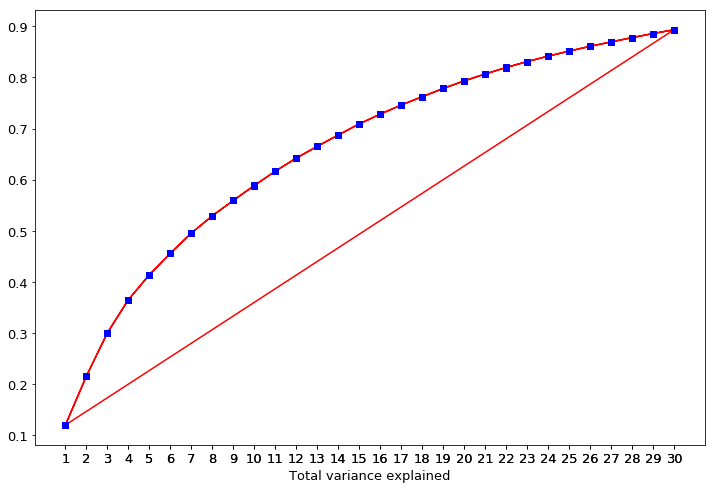

In [62]:
plt.plot(principal_components, total_explained_var, 'r')
plt.plot(principal_components, total_explained_var, 'bs')
plt.xlabel('Number of PCs', fontsize=13)
plt.xlabel('Total variance explained', fontsize=13)

plt.xticks(principal_components, fontsize=13)
plt.yticks(fontsize=13)

In [63]:
total_explained_var[:10]

[0.12033916097167238,
 0.2159497044976933,
 0.3003938539072253,
 0.3653779238480172,
 0.41397947423419845,
 0.4561201407837908,
 0.4955369545376357,
 0.5293386057801516,
 0.559393679026682,
 0.5886307532860959]

전체 분산의 해석 증가 폭이 감소하기 시작한 시점은 주성분이 대략 10개 정도일 때임을 알 수 있습니다. 그리고 전체 분산의 80%가 설명가능한 시점은 주성분이 대략 20개 정도일 때임을 알 수 있습니다. 따라서 적절하게 선택을 하면 됩니다.

## 5. SVD를 이용하여, PCA를 구해보기

In [69]:
from sklearn.decomposition import TruncatedSVD

### (1)  SVD를 이용
SVD를 이용하면 $X$의 공분산 행렬($X^TX$)에 대한 고유벡터를 구할수 있습니다.

In [73]:
number_of_eigenvectors = []
total_explained_var = []

In [75]:
for i in range(max_pc):
    pca = TruncatedSVD(n_components=i+1, n_iter=300)
    reduced_x = pca.fit_transform(scaled_x)
    variance = pca.explained_variance_ratio_.sum()
    number_of_eigenvectors.append(i+1)
    total_explained_var.append(variance)

### (2) 최적의 주성분 개수 찾기

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 11 Text yticklabel objects>)

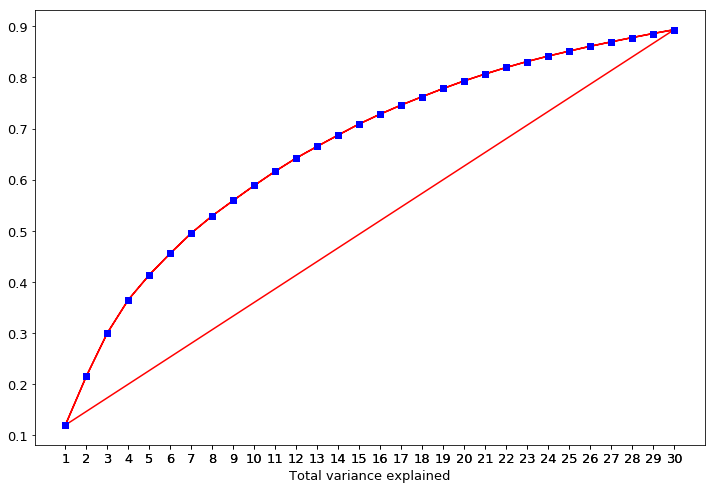

In [76]:
plt.plot(principal_components, total_explained_var, 'r')
plt.plot(principal_components, total_explained_var, 'bs')
plt.xlabel('Number of PCs', fontsize=13)
plt.xlabel('Total variance explained', fontsize=13)

plt.xticks(principal_components, fontsize=13)
plt.yticks(fontsize=13)

In [77]:
total_explained_var[:10]

[0.12033916097734884,
 0.21594970500832722,
 0.3003938539345727,
 0.3653779330098139,
 0.41397948176947785,
 0.45612068046219717,
 0.49554150849787104,
 0.5294353177442533,
 0.5594175278605061,
 0.5887375533730284]